In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from gendis.genetic import GeneticExtractor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff
from tools.experiments import Experiments

np.random.seed(1337)  # Random seed for reproducibility

tr_gen_options = {"samples": 25,
                  "freq": 3,
                  "reset_data": True}
dt_gen_options = {"n_test": 150}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}

gen_options = {"population_size": 20,
               "iterations": 20,
               "verbose": True,
               "normed": True,
               "add_noise_prob": 0.0,
               "add_shapelet_prob": 0.3,
               "wait": 10,
               "plot": True,
               "remove_shapelet_prob": 0.3,
               "crossover_prob": 0.66,
               "n_jobs": 4}

settings = {"trajectory_generator_options": tr_gen_options,
            "data_generation_options": dt_gen_options,
            "train_test_options":train_test_options,
            "define_csvs_option": df_csv_options,
            "genetic_options": gen_options}

tr_gen_options = settings["trajectory_generator_options"]
dt_gen_options = settings["data_generation_options"]
df_csvs_options = settings["define_csvs_option"]
train_test_options = settings["train_test_options"]
genetic_options = settings["genetic_options"]

movements = ['step_up_right',
             'random'
             ]
set_movements(movements)


In [2]:
# Create files if not created
tr_gen = TrajectoryGenerator(**tr_gen_options)
tr_gen.data_generation(**dt_gen_options)
# Read in the datafiles
dex = DataExtractor()
train_df, test_df = dex.train_test_dataframes(**train_test_options)
print("The train samples length is:{0}".format(len(train_df[0] * train_test_options["split"]*2)))
print("The test samples length is:{0}\n".format(len(test_df[0] * train_test_options["split"]*2)))
dex.define_csv(**df_csvs_options)

x_train, y_train, x_test, y_test = dex.load_datasets()


Starting the generator with attributes: 
Original latitude: 37.295493
Original longitude: 23.824322
Initial bearing: 90
Initial speed: 5
Number of samples: 25
Starting time of measurements: 2015-02-01 12:00:00
With initial frequency of collected data: 3 min
and hard reset of data: True

Create directory 'data' 
now creating data for movement: step_up_right
now creating data for movement: random
Done with generator

Reading the data files....Done reading files
The train samples length is:4000
The test samples length is:1000

Creating x_train.csv--y_train.csv and x_test.csv--y_test.csv ...Done with train.csv ...Done with test.csv
Loading the csv files to the appropriate train and test arrays(nparrays)...Done


In [3]:
#x_train=angle_diff(x_train)
#x_test=angle_diff(x_test)


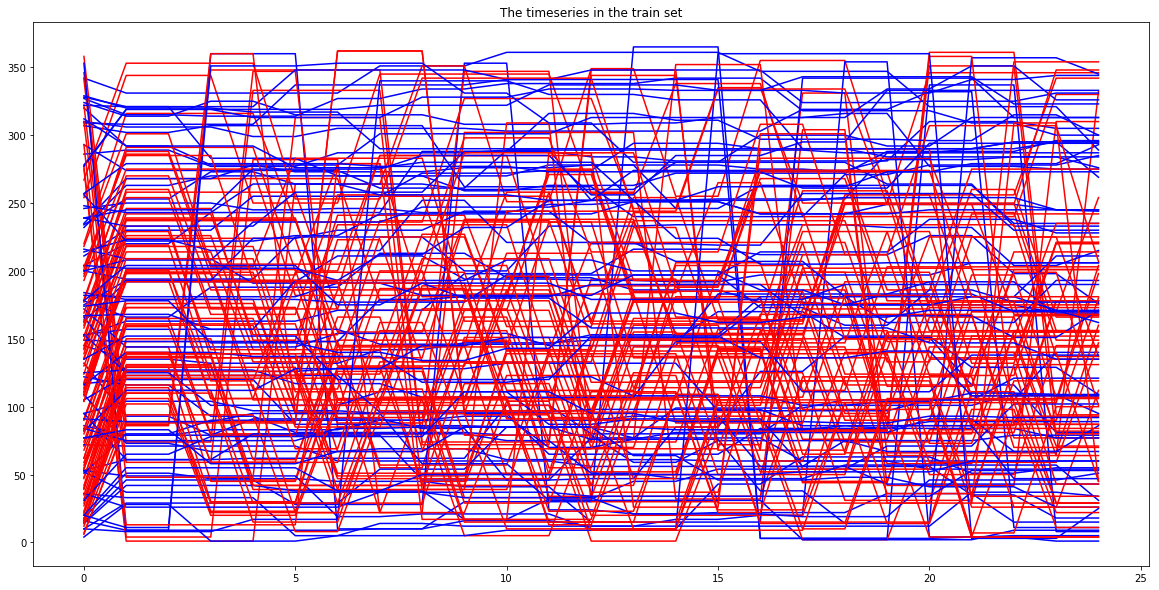

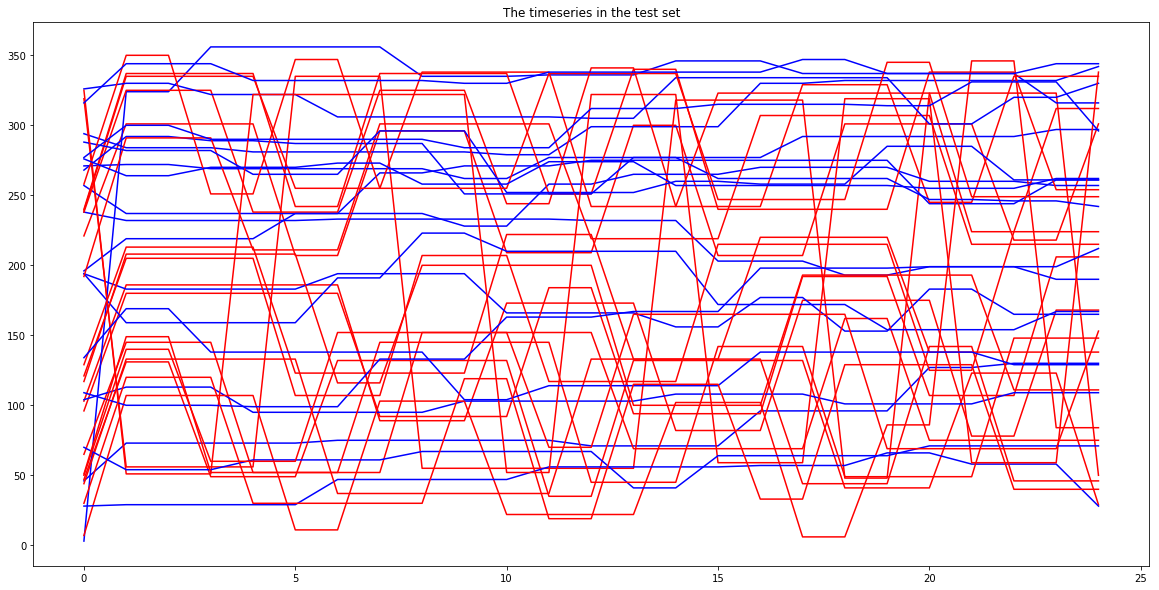

In [4]:
# Visualize the timeseries in the train and test set
colors = ['r', 'b', 'g', 'y', 'c']
plt.figure(figsize=(20, 10))
for ts, label in zip(x_train, y_train):
    plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
plt.title('The timeseries in the train set')
plt.show()

plt.figure(figsize=(20, 10))
for ts, label in zip(x_test, y_test):
    plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
plt.title('The timeseries in the test set')
plt.show()

standardized train and test data

Starting fit in genetic extractor with:
population size:20
iterations: 15
normed: True
noise_prob: 0.0
add_shapelet_prob: 0.3
remove_shapelet_prob: 0.3
crossover_prob: 0.66



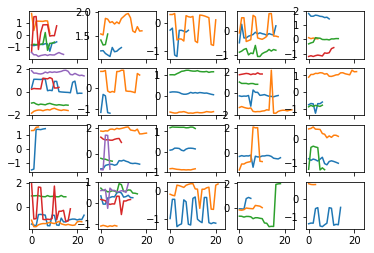

it		avg		std		max		time
1		-0.5074		0.072		-0.395705	7.9602
2		-0.4602		0.079		-0.362562	7.014
3		-0.4012		0.054		-0.32699	10.7963
4		-0.3851		0.041		-0.32699	13.3682
5		-0.3608		0.036		-0.32699	12.6165
6		-0.3587		0.046		-0.30678	16.6001
7		-0.3609		0.033		-0.300311	18.181
8		-0.3645		0.021		-0.300311	18.0267
9		-0.3639		0.028		-0.300311	13.7711
10		-0.3939		0.045		-0.291504	16.7909
11		-0.3798		0.04		-0.291504	15.0003
12		-0.364		0.033		-0.291504	14.7007
13		-0.3426		0.04		-0.291504	15.0145
14		-0.3665		0.038		-0.291504	18.8266
15		-0.3403		0.039		-0.277582	16.9126


In [5]:
print("standardized train and test data\n")
x_train, x_test = standardize_data(x_train, x_test)
genetic_extractor = GeneticExtractor(**genetic_options)
print_genetic_param(genetic_extractor)
genetic_extractor.fit(x_train, y_train)

In [6]:
distances_train = genetic_extractor.transform(x_train)
distances_test = genetic_extractor.transform(x_test)
lr = LogisticRegression()
lr.fit(distances_train, y_train)

# Print the accuracy score on the test set
accuracy_result = accuracy_score(y_test, lr.predict(distances_test))
print('Accuracy = {}'.format(accuracy_result))

Accuracy = 0.95
